In [1]:
import numpy as np 
import pandas as pd 

import os
import re

In [2]:
!pip install pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.6/40.6 kB 770.6 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 9.7 MB/s eta 0:00:00


In [3]:
import pdfplumber

In [4]:
pdf_path = r"../input/pdf-files-for-document-search-and-classification/Prod chem book/Chapters/3- Scale Control.pdf"

**Function to extract text from single pdf file**

In [5]:
def whole_pdf(pdf_path):
    all_lines = []
    whole_pdf = ''
    with pdfplumber.open(pdf_path) as pdf:
        no_pages = len(pdf.pages)
        for page_no in range(no_pages):
            this_page = pdf.pages[page_no]
            page_text = this_page.extract_text()
            if page_text:
                whole_pdf += page_text.lower() + '\n'
    return whole_pdf

In [6]:
import os

def checkPath(list_path):
    for path in list_path:
        for (path, dirs, files) in os.walk(path):
            print(len(files))

checkPath(["../input/pdf-files-for-document-search-and-classification/Prod chem book"])

0
6
20


**Python script for searching word of interest in a folder with multiple pdf files**

In [7]:
path = r"../input/pdf-files-for-document-search-and-classification/Prod chem book/Chapters"

In [8]:
filelist=os.listdir(path)
keywords = "ADP, RPP, AFE, QPF, EIA, PSA, JOA, EIA, PSC, RSP, Tender".replace(", ", "|")
for file in filelist:
    if file.endswith('.pdf') or file.endswith('.PDF'): #different extensions on the raw dat
        with pdfplumber.open(path+'/'+ file) as pdf:
            for page in pdf.pages:
                text = page.extract_text()
                # print(text)
                result = re.search(keywords, text)
                if result:
                    print(file)
                else:
                    break
print("Search finished, if document not displayed file not found")

Search finished, if document not displayed file not found


**Python sciprt for finding words of interest in pdf files in folder path with multiple file formats**

In [9]:
path1 = r"../input/pdf-files-for-document-search-and-classification/Prod chem book"

In [10]:
keywords = "Scale, wax, hydrate, emulsion, corrosion".replace(", ", "|")
for root, dirs, files in os.walk(path1):
    for file in files:
        if file.endswith('.pdf') or file.endswith('.PDF'): #different extensions on the raw dat
            with pdfplumber.open(root+'/'+ file) as pdf:
                for page in pdf.pages:
                    text = page.extract_text()
                    # print(text)
                    result = re.search(keywords, text)
                    if result:
                        print(file)
                    else:
                        break
print("Search finished, if document not displayed file not found")

4-Preface to the First Edition.pdf
3-Preface to the Second Edition.pdf
5-Author.pdf
12- Foam Control.pdf
12- Foam Control.pdf
14- Biocides.pdf
14- Biocides.pdf
14- Biocides.pdf
5- Acid Simulation.pdf
19 - Foamers for Gas Well Deliquification.pdf
19 - Foamers for Gas Well Deliquification.pdf
2- Water and Gas Control.pdf
7- Control of Naphthenate and Other Carboxylate Fouling.pdf
7- Control of Naphthenate and Other Carboxylate Fouling.pdf
7- Control of Naphthenate and Other Carboxylate Fouling.pdf
7- Control of Naphthenate and Other Carboxylate Fouling.pdf
7- Control of Naphthenate and Other Carboxylate Fouling.pdf
6- Sand Control.pdf
6- Sand Control.pdf
Appendix 1- OSPAR Environmental Regulations for Oilfiel Chemicals.pdf
Appendix 1- OSPAR Environmental Regulations for Oilfiel Chemicals.pdf
8- Corrosion Control During Production.pdf
8- Corrosion Control During Production.pdf
8- Corrosion Control During Production.pdf
8- Corrosion Control During Production.pdf
8- Corrosion Control During

**Text extraction and pre-processing to build dataframe**

In [11]:
from subprocess import Popen, PIPE
from pdfminer.pdfinterp import PDFResourceManager, PDFPageInterpreter
from pdfminer.converter import TextConverter
from pdfminer.layout import LAParams
from pdfminer.pdfpage import PDFPage
import io
from io import StringIO
import os
import glob
import sys
import string
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /usr/share/nltk_data...


True

In [12]:
import pandas as pd
def convert_pdf_to_txt(path1):
    #alltexts = []
    filelist=os.listdir(path1)
    documentcollection=[]
    for files in filelist:
        files=os.path.join(path1,files)
        documentcollection.append(files)
    for ifiles in documentcollection:
        if ifiles.endswith('.pdf') or ifiles.endswith('.PDF'): #different extensions on the raw data
            with open(ifiles, 'rb') as fh:
                for page in PDFPage.get_pages(fh, 
                                              caching=True,
                                              check_extractable=True):
                    resource_manager = PDFResourceManager()
                    fake_file_handle = io.StringIO()
                    converter = TextConverter(resource_manager, fake_file_handle)
                    page_interpreter = PDFPageInterpreter(resource_manager, converter)
                    page_interpreter.process_page(page)
 
                    text = fake_file_handle.getvalue() # extraction of the text data
                    yield text
 
                    # closing open handles
                    converter.close()
                    fake_file_handle.close()
        
    #return alltexts

In [13]:
import os
textcontents = convert_pdf_to_txt(path)
df = pd.DataFrame(textcontents, columns = ['Text_Data']) 
df['Category'] = 'ProdChem' # Adding the taxes label

In [14]:
# Pre-processing the extracted textual data
df['Text_Data'] = df['Text_Data'].apply(lambda x: " ".join(x.lower() for x in x.split())) # lower case conversion
df['Text_Data'] = df['Text_Data'].str.replace('[^\w\s]','') # getting rid of special characters
df['Text_Data'] = df['Text_Data'].str.replace('\d+', '') # removing numeric values from between the words
df['Text_Data'] = df['Text_Data'].apply(lambda x: x.translate(string.digits)) # removing numerical numbers
stop = stopwords.words('english')
df['Text_Data'] = df['Text_Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #removing stop words
stemmer = WordNetLemmatizer()
df['Text_Data'] = [stemmer.lemmatize(word) for word in df['Text_Data']] #converting words to their dictionary form
df['Text_Data'] = df['Text_Data'].str.replace('shall', '')

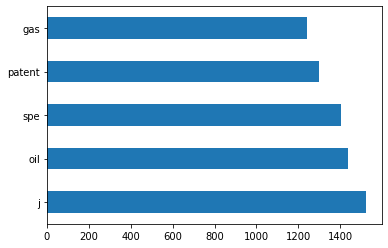

In [15]:
# Plotting 5 most occuring words in the 'Taxes' documents

freq = pd.Series(' '.join(df['Text_Data']).split()).value_counts()[:5]
freq.plot(kind='barh');
plt.show()

In [16]:
df['Identifiers'] = 'gas, patent, oil, spe'
df[:5]

,Text_Data,Category,Identifiers
0,foam control introductionfoam gas dispersion l...,ProdChem,"gas, patent, oil, spe"
1,production chemicals oil gas industrythese mix...,ProdChem,"gas, patent, oil, spe"
2,foam controlantifoams fluorosilicones expensiv...,ProdChem,"gas, patent, oil, spe"
3,production chemicals oil gas industryeopo copo...,ProdChem,"gas, patent, oil, spe"
4,foam control p g pape silicones unique chemica...,ProdChem,"gas, patent, oil, spe"


In [17]:
path2 = "../input/pdf-files-for-document-search-and-classification/Economics"

In [18]:
def convert_pdf_to_txt1(path2):
    #alltexts = []
    filelist=os.listdir(path2)
    documentcollection=[]
    for files in filelist:
        files=os.path.join(path2,files)
        documentcollection.append(files)
    for ifiles in documentcollection:
        if ifiles.endswith('.pdf') or ifiles.endswith('.PDF'): #different extensions on the raw data
            with open(ifiles, 'rb') as fh:
                for page in PDFPage.get_pages(fh, 
                                              caching=True,
                                              check_extractable=True):
                    resource_manager = PDFResourceManager()
                    fake_file_handle = io.StringIO()
                    converter = TextConverter(resource_manager, fake_file_handle)
                    page_interpreter = PDFPageInterpreter(resource_manager, converter)
                    page_interpreter.process_page(page)
 
                    text = fake_file_handle.getvalue() # extraction of the text data
                    yield text
 
                    # closing open handles
                    converter.close()
                    fake_file_handle.close()
        
    #return alltexts

In [19]:
textcontents1 = convert_pdf_to_txt1(path2)
df1 = pd.DataFrame(textcontents1, columns = ['Text_Data']) 
df1['Category'] = 'Economics' # Adding the taxes label

In [20]:
df1['Text_Data'] = df1['Text_Data'].apply(lambda x: " ".join(x.lower() for x in x.split())) # lower case conversion
df1['Text_Data'] = df1['Text_Data'].str.replace('[^\w\s]','') # getting rid of special characters
df1['Text_Data'] = df1['Text_Data'].str.replace('\d+', '') # removing numeric values from between the words
df1['Text_Data'] = df1['Text_Data'].apply(lambda x: x.translate(string.digits)) # removing numerical numbers
stop = stopwords.words('english')
df1['Text_Data'] = df1['Text_Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #removing stop words
stemmer = WordNetLemmatizer()
df1['Text_Data'] = [stemmer.lemmatize(word) for word in df1['Text_Data']] #converting words to their dictionary form
df1['Text_Data'] = df1['Text_Data'].str.replace('shall', '')

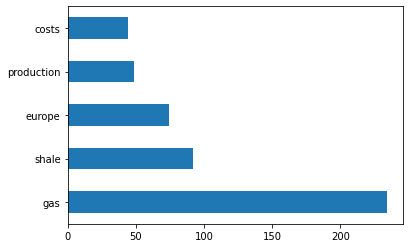

In [21]:
freq = pd.Series(' '.join(df1['Text_Data']).split()).value_counts()[:5]
freq.plot(kind='barh');
plt.show()

In [22]:
df1['Identifiers'] = 'gas, shale, europe, costs'
df1[:5]

,Text_Data,Category,Identifiers
0,case study shale gas united states although sh...,Economics,"gas, shale, europe, costs"
1,barnett shale located west texas currently lea...,Economics,"gas, shale, europe, costs"
2,cidcidcidcidcidcidcidcidcidcidcidcidcidcidcidc...,Economics,"gas, shale, europe, costs"
3,bill pyke european shale gas background notes ...,Economics,"gas, shale, europe, costs"
4,bill pyke europes indigenous conventional gas ...,Economics,"gas, shale, europe, costs"


In [23]:
env = "../input/pdf-files-for-document-search-and-classification/Enviromental"

In [24]:
def convert_pdf_to_txt2(env):
    #alltexts = []
    filelist=os.listdir(env)
    documentcollection=[]
    for files in filelist:
        files=os.path.join(env,files)
        documentcollection.append(files)
    for ifiles in documentcollection:
        if ifiles.endswith('.pdf') or ifiles.endswith('.PDF'): #different extensions on the raw data
            with open(ifiles, 'rb') as fh:
                for page in PDFPage.get_pages(fh, 
                                              caching=True,
                                              check_extractable=True):
                    resource_manager = PDFResourceManager()
                    fake_file_handle = io.StringIO()
                    converter = TextConverter(resource_manager, fake_file_handle)
                    page_interpreter = PDFPageInterpreter(resource_manager, converter)
                    page_interpreter.process_page(page)
 
                    text = fake_file_handle.getvalue() # extraction of the text data
                    yield text
 
                    # closing open handles
                    converter.close()
                    fake_file_handle.close()
        
    #return alltexts

In [25]:
textcontents2 = convert_pdf_to_txt2(env)
df2 = pd.DataFrame(textcontents2, columns = ['Text_Data']) 
df2['Category'] = 'Enviromental' # Adding the taxes label

In [26]:
df2['Text_Data'] = df2['Text_Data'].apply(lambda x: " ".join(x.lower() for x in x.split())) # lower case conversion
df2['Text_Data'] = df2['Text_Data'].str.replace('[^\w\s]','') # getting rid of special characters
df2['Text_Data'] = df2['Text_Data'].str.replace('\d+', '') # removing numeric values from between the words
df2['Text_Data'] = df2['Text_Data'].apply(lambda x: x.translate(string.digits)) # removing numerical numbers
stop = stopwords.words('english')
df2['Text_Data'] = df2['Text_Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #removing stop words
stemmer = WordNetLemmatizer()
df2['Text_Data'] = [stemmer.lemmatize(word) for word in df2['Text_Data']] #converting words to their dictionary form
df2['Text_Data'] = df2['Text_Data'].str.replace('shall', '')

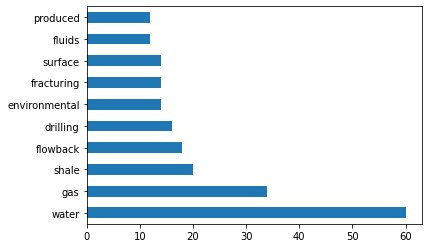

In [27]:
freq = pd.Series(' '.join(df2['Text_Data']).split()).value_counts()[:10]
freq.plot(kind='barh');
plt.show()

In [28]:
df2['Identifiers'] = 'water, flowback, drilling, environmental, fracturing'
df2[:5]

,Text_Data,Category,Identifiers
0,environmental impact nonconventional gas envir...,Enviromental,"water, flowback, drilling, environmental, frac..."
1,buffer zones drill sites surface water prevent...,Enviromental,"water, flowback, drilling, environmental, frac..."
2,source us epa draft study potential impacts hy...,Enviromental,"water, flowback, drilling, environmental, frac..."
3,shale gas environmental dimensionbill pykeaber...,Enviromental,"water, flowback, drilling, environmental, frac..."
4,outlinechallenges shale gas environmental foot...,Enviromental,"water, flowback, drilling, environmental, frac..."


In [29]:
shalegas = "../input/pdf-files-for-document-search-and-classification/Shale gas"

In [30]:
def convert_pdf_to_txt3(shalegas):
    #alltexts = []
    filelist=os.listdir(shalegas)
    documentcollection=[]
    for files in filelist:
        files=os.path.join(shalegas,files)
        documentcollection.append(files)
    for ifiles in documentcollection:
        if ifiles.endswith('.pdf') or ifiles.endswith('.PDF'): #different extensions on the raw data
            with open(ifiles, 'rb') as fh:
                for page in PDFPage.get_pages(fh, 
                                              caching=True,
                                              check_extractable=True):
                    resource_manager = PDFResourceManager()
                    fake_file_handle = io.StringIO()
                    converter = TextConverter(resource_manager, fake_file_handle)
                    page_interpreter = PDFPageInterpreter(resource_manager, converter)
                    page_interpreter.process_page(page)
 
                    text = fake_file_handle.getvalue() # extraction of the text data
                    yield text
 
                    # closing open handles
                    converter.close()
                    fake_file_handle.close()
        
    #return alltexts

In [31]:
textcontents3 = convert_pdf_to_txt3(shalegas)
df3 = pd.DataFrame(textcontents3, columns = ['Text_Data']) 
df3['Category'] = 'ShaleGas' # Adding the taxes label

In [32]:
df3['Text_Data'] = df3['Text_Data'].apply(lambda x: " ".join(x.lower() for x in x.split())) # lower case conversion
df3['Text_Data'] = df3['Text_Data'].str.replace('[^\w\s]','') # getting rid of special characters
df3['Text_Data'] = df3['Text_Data'].str.replace('\d+', '') # removing numeric values from between the words
df3['Text_Data'] = df3['Text_Data'].apply(lambda x: x.translate(string.digits)) # removing numerical numbers
stop = stopwords.words('english')
df3['Text_Data'] = df3['Text_Data'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) #removing stop words
stemmer = WordNetLemmatizer()
df3['Text_Data'] = [stemmer.lemmatize(word) for word in df3['Text_Data']] #converting words to their dictionary form
df3['Text_Data'] = df3['Text_Data'].str.replace('shall', '')

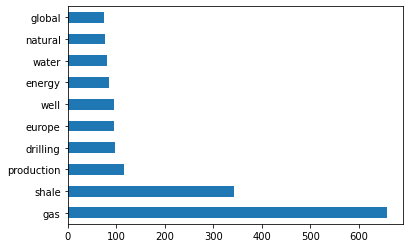

In [33]:
freq = pd.Series(' '.join(df3['Text_Data']).split()).value_counts()[:10]
freq.plot(kind='barh');
plt.show()

In [34]:
df3['Identifiers'] = 'global, natural, energy, well'
df3[:5]

,Text_Data,Category,Identifiers
0,shale gas key references modern shale gas deve...,ShaleGas,"global, natural, energy, well"
1,category project buyer seller purchase price d...,ShaleGas,"global, natural, energy, well"
2,shale gas key references modern shale gas deve...,ShaleGas,"global, natural, energy, well"
3,shale gas case study united statesbill pykeabe...,ShaleGas,"global, natural, energy, well"
4,us shale gas playssources wood mckenzie deutsc...,ShaleGas,"global, natural, energy, well"


In [35]:
frames = [df, df1, df2, df3]
finalframe = pd.concat(frames, sort=False)
finalframe = finalframe[['Identifiers', 'Text_Data', 'Category']]
finalframe = finalframe.reset_index(drop=True)
finalframe[:5]

,Identifiers,Text_Data,Category
0,"gas, patent, oil, spe",foam control introductionfoam gas dispersion l...,ProdChem
1,"gas, patent, oil, spe",production chemicals oil gas industrythese mix...,ProdChem
2,"gas, patent, oil, spe",foam controlantifoams fluorosilicones expensiv...,ProdChem
3,"gas, patent, oil, spe",production chemicals oil gas industryeopo copo...,ProdChem
4,"gas, patent, oil, spe",foam control p g pape silicones unique chemica...,ProdChem


**Counting the data points of each category**

We can see that we have a lot of data for ProdChem and very less for Enviromental category. This suggests that the data is imbalanced and needs data augmentation. Under sampling was not an option because of the already small dataset which leads to less performance of the model overall. So over sampling is one of the options that needs to be taken into consideration.

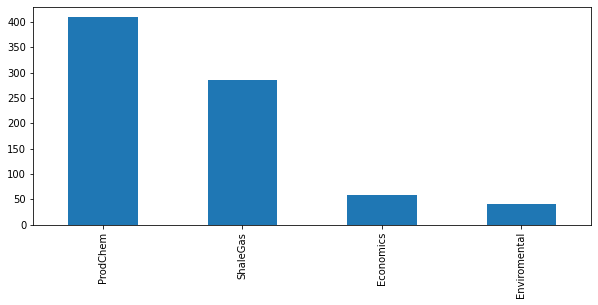

In [36]:
import matplotlib.pyplot as plt
my_tags = ['ProdChem','Economics','ShaleGas','Enviromental']
plt.figure(figsize=(10,4))
finalframe.Category.value_counts().plot(kind='bar');
plt.show()

**Building different models for classification of the documents**

Training data after using TF-IDF. Term Frequency - Inverse document frequency takes care of the assigning vectors to the word based on the frequency of them occuring in each document.

In [37]:
# Converting the text data into vectors using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.preprocessing import LabelEncoder
# Generating 1000 features for the input for the model
tfidfconverter = TfidfVectorizer(max_features=1000, stop_words=stopwords.words('english')) 
X = pd.DataFrame(tfidfconverter.fit_transform(finalframe['Text_Data']).toarray())
print(X[:5])
#X.columns = range(X.shape[1])
labelencoder = LabelEncoder() #Converting the labels to numeric labels
y = labelencoder.fit_transform(finalframe['Category'])

   0    1    2    3    4         5    6     7    8    9    ...  990  991  992  \
0  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.00  0.0  0.0  ...  0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.00  0.0  0.0  ...  0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.148697  0.0  0.00  0.0  0.0  ...  0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.04  0.0  0.0  ...  0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.000000  0.0  0.00  0.0  0.0  ...  0.0  0.0  0.0   

        993  994  995  996  997  998  999  
0  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.155785  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.000000  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 1000 columns]


In [38]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)  

**Oversampling the data to get well balanced classes for model building**

In [39]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X, y)

In [40]:
import numpy as np
unique, counts = np.unique(y_resampled, return_counts=True)
print(np.asarray((unique, counts)).T)

[[  0 409]
 [  1 409]
 [  2 409]
 [  3 409]]


**Oversampling has made all the classes equally balanced with 409 data points each**

In [41]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

**Building different models and comparing their performances**

**Random Forest Classifier**

In [42]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
classifier = RandomForestClassifier(n_estimators=1200, random_state=1)  #defining 1000 nodes 
rf = classifier.fit(X_train, y_train)  
y_pred = classifier.predict(X_test)

Accuracy: 0.9390243902439024
              precision    recall  f1-score   support

    ProdChem       0.96      0.93      0.94        83
   Economics       0.84      1.00      0.91        88
    ShaleGas       1.00      1.00      1.00        80
Enviromental       1.00      0.82      0.90        77

    accuracy                           0.94       328
   macro avg       0.95      0.94      0.94       328
weighted avg       0.95      0.94      0.94       328

Confusion matrix:
 [[77  6  0  0]
 [ 0 88  0  0]
 [ 0  0 80  0]
 [ 3 11  0 63]]


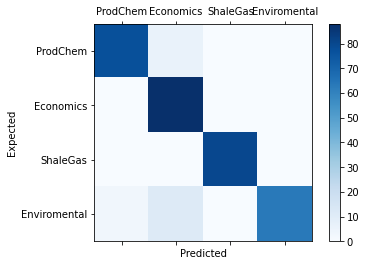

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print('Accuracy: %s' % accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred,target_names=my_tags))  
#print(confusion_matrix(y_test,y_pred)) 

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['ProdChem','Economics','ShaleGas','Enviromental']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

**It can be seen that the random forest classifier gives an accuracy of around 94% and performs well for classification with good F1 scores. It is predicting almost the right classes for the test data with few false positives and negatives**

**Naive Bayes Classifier**

NBC is based on describing counts among number of categories so it is used in text classification where the features are related to word counts or frequencies within the document to be classified.

Accuracy: 0.850609756097561
              precision    recall  f1-score   support

    ProdChem       0.91      0.88      0.90        83
   Economics       0.90      0.72      0.80        88
    ShaleGas       1.00      0.99      0.99        80
Enviromental       0.65      0.83      0.73        77

    accuracy                           0.85       328
   macro avg       0.86      0.85      0.85       328
weighted avg       0.87      0.85      0.85       328

Confusion matrix:
 [[73  0  0 10]
 [ 0 63  0 25]
 [ 0  1 79  0]
 [ 7  6  0 64]]


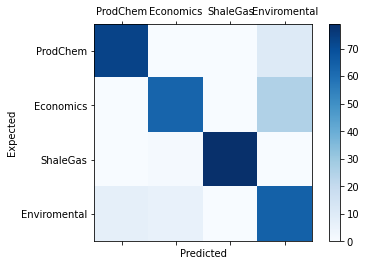

In [44]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train, y_train)

y_pred = clf.predict(X_test)
print('Accuracy: %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=my_tags))

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['ProdChem','Economics','ShaleGas','Enviromental']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Naive Bayes classifier gives an accuracy of around 85%. It provides less accuracy levels on test dataset comparing to Random Forest Classifier. 

**XGBoost Classifier**

Extreme Gradiant Boosting algorithm is an tree ensemble model which is optimized to predict quicker by utilizing available resources and takes care of over fitting.

Accuracy: 0.948170731707317
              precision    recall  f1-score   support

    ProdChem       0.96      0.93      0.94        83
   Economics       0.86      1.00      0.93        88
    ShaleGas       1.00      1.00      1.00        80
Enviromental       1.00      0.86      0.92        77

    accuracy                           0.95       328
   macro avg       0.96      0.95      0.95       328
weighted avg       0.95      0.95      0.95       328

Confusion matrix:
 [[77  6  0  0]
 [ 0 88  0  0]
 [ 0  0 80  0]
 [ 3  8  0 66]]


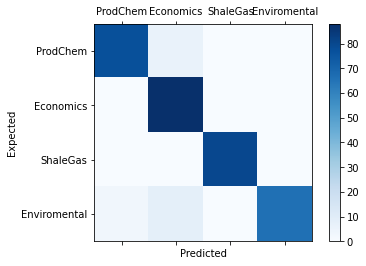

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %s" % (accuracy))
print(classification_report(y_test, y_pred,target_names=my_tags))

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['ProdChem','Economics','ShaleGas','Enviromental']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

XGBoost classifier gives an accuracy of around 95% and performs well for classification with good F1 scores. Prediction accuracy from this model is higher comparing to two previous ones. 